# Preâmbulo
Inteligência artificial, aprendizagem de máquina e estatística são campos fundamentalmente entrelaçados, assim sendo, antes de tratar de processos de classificão propriamente ditos devemos relembrar de alguns conceitos fundamentais de estatística para verdadeiramente compreender  os algoritmos tratados adiante.

## Medidas de Posição
* Média
* Mediana
* Moda
* Percentis

O objetivo de um algoritmo de ML é fazer uma predição mais fundamentada do que um mero chute. Uma das formas mais rudimentares de fazer isso é através da média. Observe o código à seguir.

# Técnicas de Classificação
Os algoritmos de aprendizagem de máquina são comumente dívididos em duas famílias: algoritmos de aprendizagem _supervisionada_ e de aprendizagem _não-supervisionada_. Antes de passarmos ao estudo dos algoritmos de classificação propriamente ditos, é preciso compreender alguns conceitos relacionados a essas diferenças, e para isso vamos recorrer a um exemplo.

Imagine que em uma academia de esportes os novos clientes passam por testes físicos para definir a sua afinidade esportiva. Primeiramente, os examinados são submetidos a uma corrida de 100m, e o tempo em segundos é inserido na base de dados como `var1`. Em seguinda, os examinados precisam correr uma longa distância e o tempo em segundos é inserido na base de dados como `var2`. Por fim, os candidatos precisam levantar pesos, e o peso máximo levantado em kgs é inserido na base de dados como `var3`. Perceba que esses dados por si só não têm capacidade de indicar a afinidade esportiva de um candidato.

Almejando obter mais informação sobre os examinados, um profissional de educação física sugere renomear as colunas `var1`, `var2` e `var3` para `velocidade`, `resistência` e `força`, respectivamente. Além disso, foi criada uma variável nova, chamada `aptidao`, onde cada observação poderia receber uma das seguintes categorias `atletismo`, `futebol`, `fisiculturismo`, e o profissional atribuiu à cada cliente uma categoria com base nos seus resultados.

Note que ao fazer isso foi introduzido significado para as variáveis, possibilitando a análise da variável `aptidao` em _relação às demais_. Essa variável `aptidao` é a etiqueta (ou label) dos dados para o problema posto. Note que a etiqueta de um conjunto de dados depende do problema a ser resolvido, e um mesmo conjunto pode ser considerado etiquetado, ou não, dependendo do que se deseja analisar.

Fundamentalmente os algorítmos de aprendizagem não supervisionada se preocupam com tarefas de _agrupamento_, _etiquetagem_, e de _redução de dimensionalidade_ aplicados em dados não etiquetados, habitualmente empregados em uma fase preparatória, anterior à aplicação de algoritmos de aprendizagem supervisionada.

Os algoritmos de aprendizagem supervisionada, por sua vez, são empregados para resolver dois tipos de problema: __regressão__ e __classificação__.

Os algoritmos de regressão se encarregam de receber dados e fornecer uma variável contínua (um número real) como saída. Por exemplo, dado que o cliente x correu 100m em 20 segundos, ele é estimado a correr a longa distância em x segundos. O algoritmo mais conhecido dessa família é a regressão linear.

Por sua vez, os algoritmos de classificação se ocupam das variáveis categóricas discretas, um estado dentre um número finito de possibilidades. Por exemplo, dado os resultados das outras variáveis, o melhor esporte para o cliente é: `fisiculturismo`. Um algoritmo bastante conhecido dessa família é a árvore de decisão.

Nesta apresentação serão abordados os seguintes algoritmos de classificação:
* Regressão Logística
* Support Vector Machine (SVM)
* Árvore de Decisão (Decision Tree)
* Floresta Aleatória (Random Forest)


In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

In [11]:
# Criando uma base de dados com 100 linhas e 2 colunas, e valores variando entre 0 e 1
df_pre = pd.DataFrame(np.random.normal(0, 1, size=(100, 2)), columns=['x1', 'x2'])
# Tentando prever os valores de x2 através de chutes aleatórios e armazenndo os resultados em uma nova coluna 'chute'
df_pre["chute"] = np.random.default_rng().uniform(-2, 2, size=(100))
# Tentando prever os valores de x2 utilizando a média e armazenando os resultados em uma nova coluna 'media'
df_pre["media"] = 0
df_pre

,x1,x2,chute,media
0,-0.919355,-0.937357,-1.249197,0
1,-0.221258,1.852347,1.773348,0
2,0.773063,-2.418797,1.063542,0
3,0.270082,-0.687015,-1.915136,0
4,1.063003,-0.943891,-0.251226,0
...,...,...,...,...
95,0.106540,0.431563,-0.779607,0
96,0.239820,0.730072,-0.435673,0
97,-0.558423,-0.384856,-0.868037,0
98,-1.310321,0.712044,-1.955254,0


Para avaliar a acurácia da nossa predição, calculamos o erro quadrado médio (mean squared error, MSE) entre os resultados reais e as nosssas predições. O cálculo é simples, para um ponto, verificamos a diferença entre a predição e o resultado real e elevamos ao quadrado. Este é o erro quadrado daquele ponto. O erro quadrado médio do modelo consiste na média da soma dos quadrados das diferenças entre os resultados reais e os resultados preditos, divididos pelo tamanho da amostra. Em matematiquês:
$$MSE=\frac{1}{N}\sum_{i=1}^n(Y_i-\hat{Y}_i)^2$$

Usamos a função `mean_squared_error()` da biblioteca scikit_learn para calcular o MSE do nosso modelo.

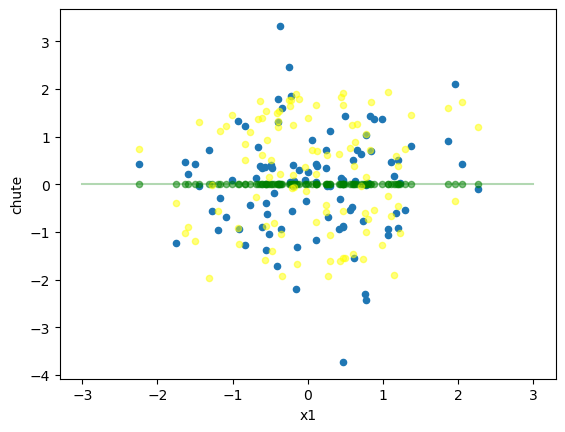

In [12]:
ax1 = df_pre.plot(kind='scatter', x='x1', y='x2')
ax2 = df_pre.plot(kind='scatter', x='x1', y='media', c='green', alpha=.5, ax=ax1)
ax3 = df_pre.plot(kind='scatter', x='x1', y='chute', c='yellow', alpha=.5, ax=ax1)
# linha da média
plt.plot([-3, 3], [0, 0], color='green', alpha=.3, linestyle='-')

In [13]:
mse_chute = mean_squared_error(df_pre['x2'], df_pre['chute'])
mse_media = mean_squared_error(df_pre['x2'], df_pre['media'])
print("Erro quadrado médio do chute: ", mse_chute)
print("Erro quadrado médio da média: ", mse_media)

Erro quadrado médio do chute:  2.7266862771702916
Erro quadrado médio da média:  1.1182910328350695


## Criando o exemplo em código
Iniciamos com a importação das bibliotecas. Note que `pandas`, `numpy` e `matplotlib` são usados na grande maioria dos casos quando utilizamos a linguagem Python, portanto, aprender a utilizar essas bibliotecas é fundamental.
> Uma tarefa importante no estudo de machine learning é a criação de exemplos, tanto dos dados, quanto dos algoritmos. Ser capaz de construir um conjunto ficcional de dados é importante para a demonstração de técnicas de implementação, e construir os algoritmos a partir do zero é importante para desenvolver a intuição por trás dos algoritmos.

In [14]:
# Importando as bibliotecas
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn import tree # implementação de árvore de decisão do sklearn

In [15]:
# Usando a distribuição normal para gerar dados aleatórios
velocidade = np.random.normal(14, 5, 100)
resistencia = np.random.normal(6180, 2760, 100)
potencia = np.random.normal(70, 50, 100)
df = pd.DataFrame({'velocidade': velocidade, 'resistencia': resistencia, 'potencia': potencia})
df.head()

,velocidade,resistencia,potencia
0,21.203243,5407.797262,49.575634
1,12.140342,7204.537433,83.606227
2,9.049818,2026.647344,28.051588
3,7.494207,2258.400770,110.403732
4,15.015419,7326.363771,70.546233


In [16]:
# Usando a distribuição normal para gerar dados aleatórios
velocidade = np.random.normal(14, 5, 100)
resistencia = np.random.normal(6180, 2760, 100)
potencia = np.random.normal(70, 50, 100)
df = pd.DataFrame({'velocidade': velocidade, 'resistencia': resistencia, 'potencia': potencia})
df.head()

,velocidade,resistencia,potencia
0,12.304872,5184.611315,176.707240
1,15.098494,6352.507629,83.853925
2,11.853349,4972.516221,114.175543
3,8.185427,9373.493000,122.357650
4,19.508704,9211.273220,121.344922


Para criar a etiqueta dos dados, adicionamos uma nova coluna chamada `aptidao`, e fazemos a anotação manual de cada observação.

> Para este exemplo os dados serão pseudo-anotados, mas em um contexto de negócios real de negócio, outras técnicas são empregadas para realizar a anotação, como a anotação por um especialista de domínio, uma rede neural, ou um algoritmo não-supervisionado.

Como a magnitude das variáveis é muito diferente, normalizamos os dados

In [17]:
# normalizando os dados
normal_df = (df-df.mean())/df.std()

# mapeando os resultados com uma categoria de esporte
dict_map = {
    "velocidade": "atletismo",
    "resistencia": "futebol",
    "potencia": "fisiculturismo"
}

# criando a etiqueta
df['aptidao'] = normal_df.idxmax(axis=1).map(dict_map)
normal_df

,velocidade,resistencia,potencia
0,-0.518219,-0.440922,1.961968
1,0.106437,-0.031904,0.134252
2,-0.619180,-0.515201,0.731100
3,-1.439330,1.026099,0.892156
4,1.092563,0.969287,0.872221
...,...,...,...
95,0.589330,-0.037893,0.338232
96,-0.979727,0.312528,-0.905931
97,2.040434,-1.016985,-1.498455
98,-0.290371,0.027010,0.504808


## Aplicando um modelo de ML para prever os resultados

Agora que já tratamos os nossos dados fictícios, podemos aplicar um algoritmo de ML real para comparar com os resultados obtidos através de chutes e através da simples média. Aqui vamos usar a árvore de decisão implementada na biblioteca `sklearn`.

In [18]:
from sklearn.model_selection import train_test_split

# Fazendo o split entre base de treino e base de teste
y_train, y_test = train_test_split(df, test_size=.25)
resultado_original = y_test['aptidao']
y_test.drop("aptidao", axis=1, inplace=True)

# Criando o objeto classificador
clf = tree.DecisionTreeClassifier()

# Ajustando o modelo aos dados
clf = clf.fit(y_train[['velocidade', 'resistencia', 'potencia']], y_train['aptidao'])

# Fazendo a previsão
y_pred = clf.predict(y_test)
y_test['resultado_original'] = resultado_original
y_test['predicao_dt'] = y_pred
y_test

,velocidade,resistencia,potencia,resultado_original,predicao_dt
80,16.415470,4342.683800,83.101744,atletismo,fisiculturismo
14,16.437968,4824.039466,-27.281723,atletismo,atletismo
18,12.913425,8907.602829,78.765867,futebol,futebol
4,19.508704,9211.273220,121.344922,atletismo,atletismo
77,21.939046,8981.921239,76.870397,atletismo,atletismo
32,14.657548,7978.211087,94.151966,futebol,futebol
72,7.947608,7939.745167,-10.804153,futebol,futebol
53,16.739954,-3021.877080,78.096147,atletismo,atletismo
59,10.557369,6672.539673,108.816364,fisiculturismo,futebol
99,14.538030,6709.760858,74.153951,futebol,atletismo


Podemos comparar o nosso modelo com um modelo que escolher uniformemente a mesma categoria, e um modelo de escolha aleatória. No código abaixo criamos essas "predições".

In [19]:
y_test['uniforme'] = 'futebol'
y_test['chute'] = np.random.choice(["futebol", "fisiculturismo", "atletismo"], len(y_test))
y_test

,velocidade,resistencia,potencia,resultado_original,predicao_dt,uniforme,chute
80,16.415470,4342.683800,83.101744,atletismo,fisiculturismo,futebol,atletismo
14,16.437968,4824.039466,-27.281723,atletismo,atletismo,futebol,futebol
18,12.913425,8907.602829,78.765867,futebol,futebol,futebol,fisiculturismo
4,19.508704,9211.273220,121.344922,atletismo,atletismo,futebol,fisiculturismo
77,21.939046,8981.921239,76.870397,atletismo,atletismo,futebol,atletismo
32,14.657548,7978.211087,94.151966,futebol,futebol,futebol,atletismo
72,7.947608,7939.745167,-10.804153,futebol,futebol,futebol,atletismo
53,16.739954,-3021.877080,78.096147,atletismo,atletismo,futebol,futebol
59,10.557369,6672.539673,108.816364,fisiculturismo,futebol,futebol,fisiculturismo
99,14.538030,6709.760858,74.153951,futebol,atletismo,futebol,atletismo


In [20]:
from sklearn import metrics

# Mostrando a precisão do modelo
print("Precisão (Decision Tree):", metrics.accuracy_score(y_test.resultado_original, y_test.predicao_dt))
print("Precisão (Uniforme):", metrics.accuracy_score(y_test.resultado_original, y_test.uniforme))
print("Precisão (Chute):", metrics.accuracy_score(y_test.resultado_original, y_test.chute))

Precisão (Decision Tree): 0.8
Precisão (Uniforme): 0.36
Precisão (Chute): 0.32


## Implementando o algoritmo manualmente
A estrutura de dados que melhor representa o algorimo é uma árvore binária. Na raiz da árvore temos todas as observações, e a cada nódulo, chamados de nódulos de decisão, os dados se dividem, com o objetivo de encontrar uma árvore onde cada folha contenha uma subdivisão pura dos dados, quer dizer, numa tarefa de classificação, uma folha conterá um grupo onde todas as observações vão pertencer a mesma categoria.

### Definindo os valores de corte
O objetivo principal do algoritmo é aprender com um conjunto de treinamento quais são as regras de decisão que geram a árvore desejada. Para tanto, são usados dois métodos, principalmente: 
> * Função de entropia
> * Índice GINI
